# Play With Math 
__(Math Review and Visualisation)__

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.style.use('ggplot')
%matplotlib inline

### Fourier Series, Descrete Fourier Transform

[1] __Discrete Fourier Transform__, calculate the coefficient:

$C_k =  \frac{1}{N} \sum_{n=-N/2}^{N/2} x(t)*e^{- 2 \pi i nk /N}$

where $N$: number of samples

[2] __Fourier Series__, reconstruct the original signal

$x(t) = \sum_{n=-N/2}^{N/2} C_k*e^{- 2 \pi i nk /N}$

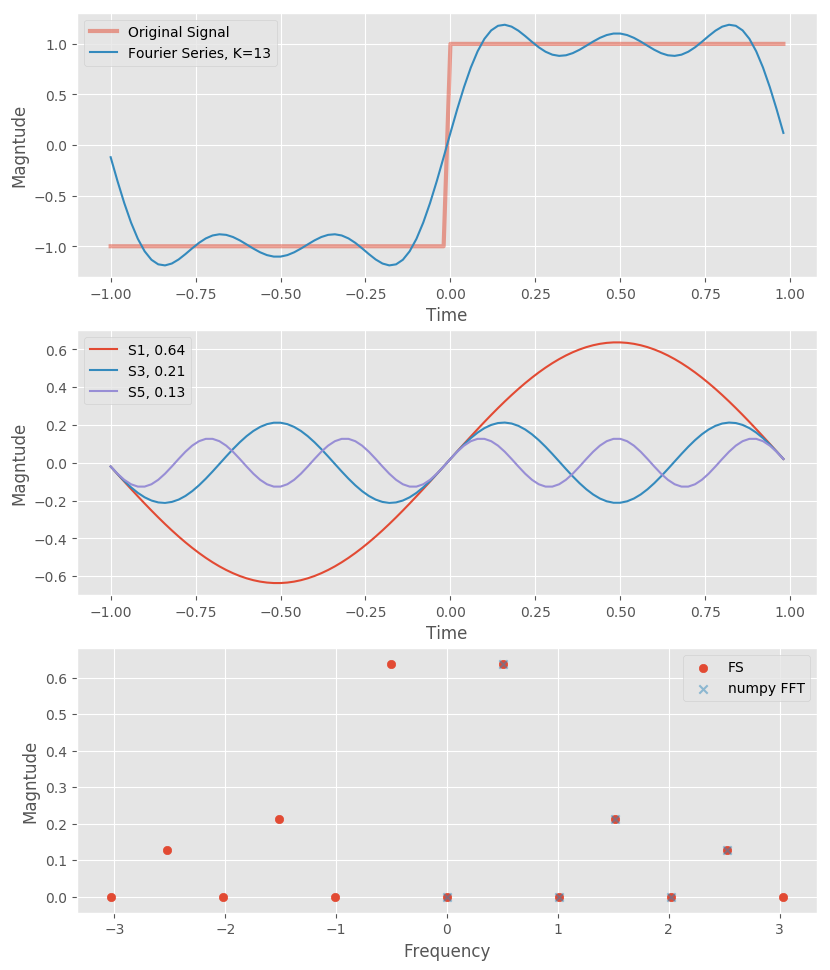

In [2]:
def do_fs(x, n_series=np.inf):
    n_samples = len(x)
    ts = np.arange(0, n_samples) - (n_samples >> 1)

    n_series = min(n_samples, n_series)
    ks = np.arange(0, n_series) - (n_series >> 1)

    c_k = np.inner(x, np.exp(-1j * 2 * np.pi * ts * ks[:, None] /
                             n_samples)) / n_samples
    ys = c_k[:, None] * np.exp(1j * 2 * np.pi * ts * ks[:, None] / n_samples)

    return c_k, ks, ys


def plot_fs(t, x, c_k, ks, ys, n_show=12, thr_show=0.01):
    n_series = len(c_k)
    c_mag = abs(c_k)
    y = ys.sum(axis=0)
    

    _, ax = plt.subplots(3, 1, figsize=(8, 10))
    ax[0].plot(t, x, label='Original Signal', linewidth=3, alpha=0.5)
    ax[0].plot(t, y.real, label='Fourier Series, K=%d' % n_series)
    ax[0].legend()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Magntude')

    for i in range(n_series >> 1, min(n_series, (n_series >> 1) + n_show)):
        if c_mag[i] >= thr_show:
            ax[1].plot(t, ys[i].real, label='S%d, %.2f' % (ks[i], c_mag[i]))
            ax[1].legend()
            ax[1].set_xlabel('Time')
            ax[1].set_ylabel('Magntude')

    
    f_sig = 1 / (t[-1] - t[0])
    ax[2].scatter(ks * f_sig, c_mag, label='FS')
    npf = np.fft.fft(x)
    ax[2].scatter(np.arange(0, n_series >> 1) * f_sig,
                  abs(npf[0: n_series >> 1]) / len(x),
                  marker='x', alpha=0.5, label='numpy FFT')
    ax[2].legend()
    ax[2].set_xlabel('Frequency')
    ax[2].set_ylabel('Magntude')

n_cycles = 1
n_samples = 100
t = np.linspace(-1, 1, n_samples, endpoint=False)
x = signal.square(t * np.pi * n_cycles)

c_k, ks, ys = do_fs(x, n_series=13)
plot_fs(t, x, c_k, ks, ys)

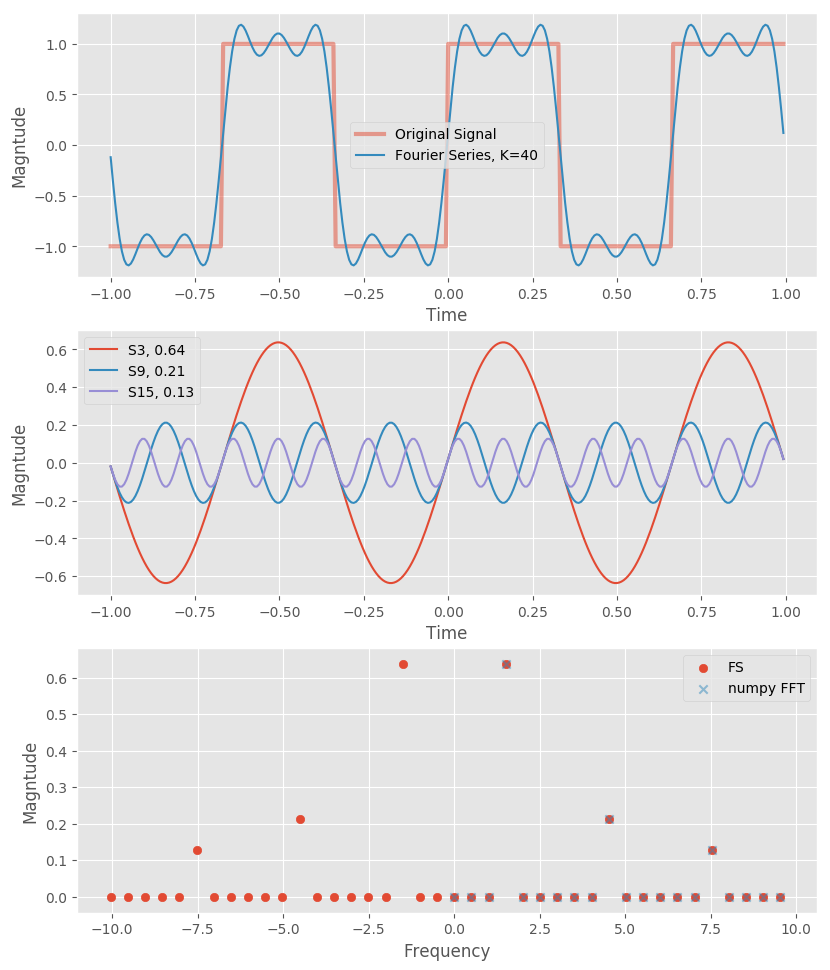

In [3]:
n_cycles = 3
n_samples = 300
t = np.linspace(-1, 1, n_samples, endpoint=False)
x = signal.square(t * np.pi * n_cycles)

plot_fs(t, x, *do_fs(x, n_series=40), n_show=20)